In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('dark_background')

**In this exercise, we are building a prediction model to predict whether a student gets admitted into a university base on their results on two exams**

In [2]:
data = pd.read_csv('ex2data1.txt', header=None, names=[
                   'Exam 1', 'Exam 2', 'Admit'])

In [3]:
Not_Admitted = data.loc[(data['Admit'] == 0)]
Admitted = data.loc[(data['Admit'] == 1)]

**We now visualize the data**

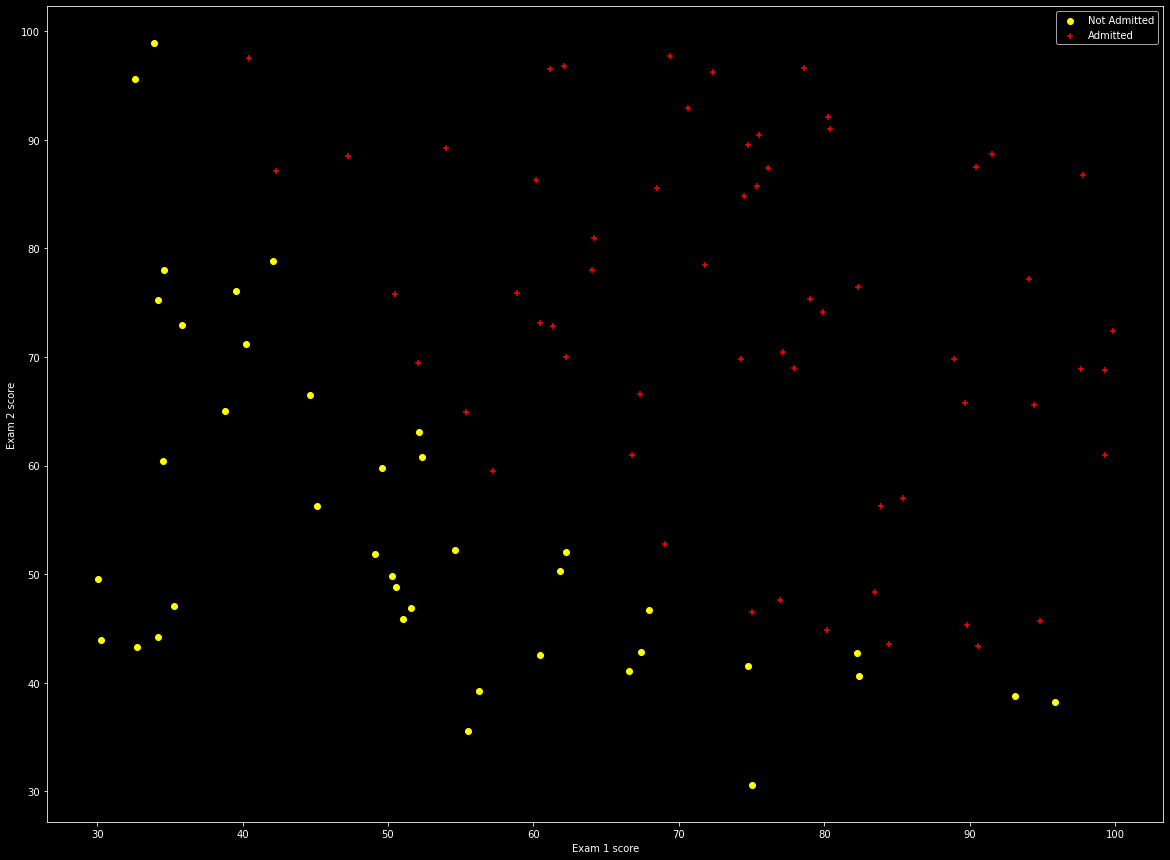

In [4]:
plt.figure(figsize=(20, 15))
plt.scatter(Not_Admitted['Exam 1'], Not_Admitted['Exam 2'], c='Yellow')
plt.scatter(Admitted['Exam 1'], Admitted['Exam 2'], marker='+', c='Red')
plt.grid(False)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

**Logistic Regression Hypothesis:**<br> $$h_\theta(x) = g(\theta^Tx)$$
**Sigmoid Function:**<br> $$g(z) = \frac{1}{1 + e^{-z}}$$

*Implement sigmoid function*

In [5]:
def Sigmoid(z):
    gz = 1/(1+np.exp(-z))
    return gz

In [6]:
print('Testing the sigmoid function of g(0):', Sigmoid(0))

Testing the sigmoid function of g(0): 0.5


**Cost function of logistic regression:**<br> $$J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$<br>
**Gradient descent:**<br> Repeat {<br>$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum\limits_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$$ <br>}


In [7]:
X_mat = np.asanyarray(data.iloc[:, [0, 1]])
m, n = X_mat.shape[0], X_mat.shape[1]
Y_mat = np.asanyarray(data.iloc[:, 2]).reshape(m, 1)
# Add intercept terms to X
X_mat = np.hstack((np.ones((m, 1)), X_mat))
# Initialize fitting parameters
initial_theta = np.zeros((n+1, 1))

**Here we are finding the gradient of the cost function, not gradient descent**

In [8]:
def CostFunction(theta, x, y):
    n = theta.shape[0]
    Cost = 1/m * np.sum((-y * np.log(Sigmoid(x @ theta))) -
                        ((1 - y) * np.log(1 - Sigmoid(x @ theta))))
    gradient = (1/m * (Sigmoid(x @ theta) - y).T @ x).reshape(n, 1)
    return Cost, gradient

In [9]:
cost, gradient = CostFunction(initial_theta, X_mat, Y_mat)
print('Cost at initial theta (zeros):', round(cost, 5))
print('Gradient is: \n', gradient)

Cost at initial theta (zeros): 0.69315
Gradient is: 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


*Compute and display cost and gradient with non-zero theta*

In [10]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(3, 1)
cost_test, gradient_test = CostFunction(test_theta, X_mat, Y_mat)
print('Cost at initial theta (zeros):', round(cost_test, 5))
print('Gradient is: \n', gradient_test)

Cost at initial theta (zeros): 0.21833
Gradient is: 
 [[0.04290299]
 [2.56623412]
 [2.64679737]]


**Try using gradient descent to reduce cost function, use feature scaling first**

In [11]:
def featurenormalize(x):
    X_mat_mean = np.mean(x, axis=0)
    X_mat_std = np.std(x, axis=0)
    X_norm = (x - X_mat_mean) / X_mat_std
    return X_norm

In [12]:
X_mat_norm = featurenormalize(X_mat[:, 1:])
X_mat_norm = np.hstack((np.ones((m, 1)), X_mat_norm))

In [13]:
def gradientdescent(theta, x, y, alpha, iter_num):
    J = []
    for i in range(iter_num):
        cost, gradient = CostFunction(theta, x, y)
        J.append(cost)
        theta = theta - (alpha * gradient)
    return J, theta

In [14]:
# Test parameters for gradient descent
J_1, theta_1 = gradientdescent(initial_theta, X_mat_norm, Y_mat, 0.01, 400)
J_2, theta_2 = gradientdescent(initial_theta, X_mat_norm, Y_mat, 0.03, 400)
J_3, theta_3 = gradientdescent(initial_theta, X_mat_norm, Y_mat, 0.1, 400)
J_4, theta_4 = gradientdescent(initial_theta, X_mat_norm, Y_mat, 1, 400)

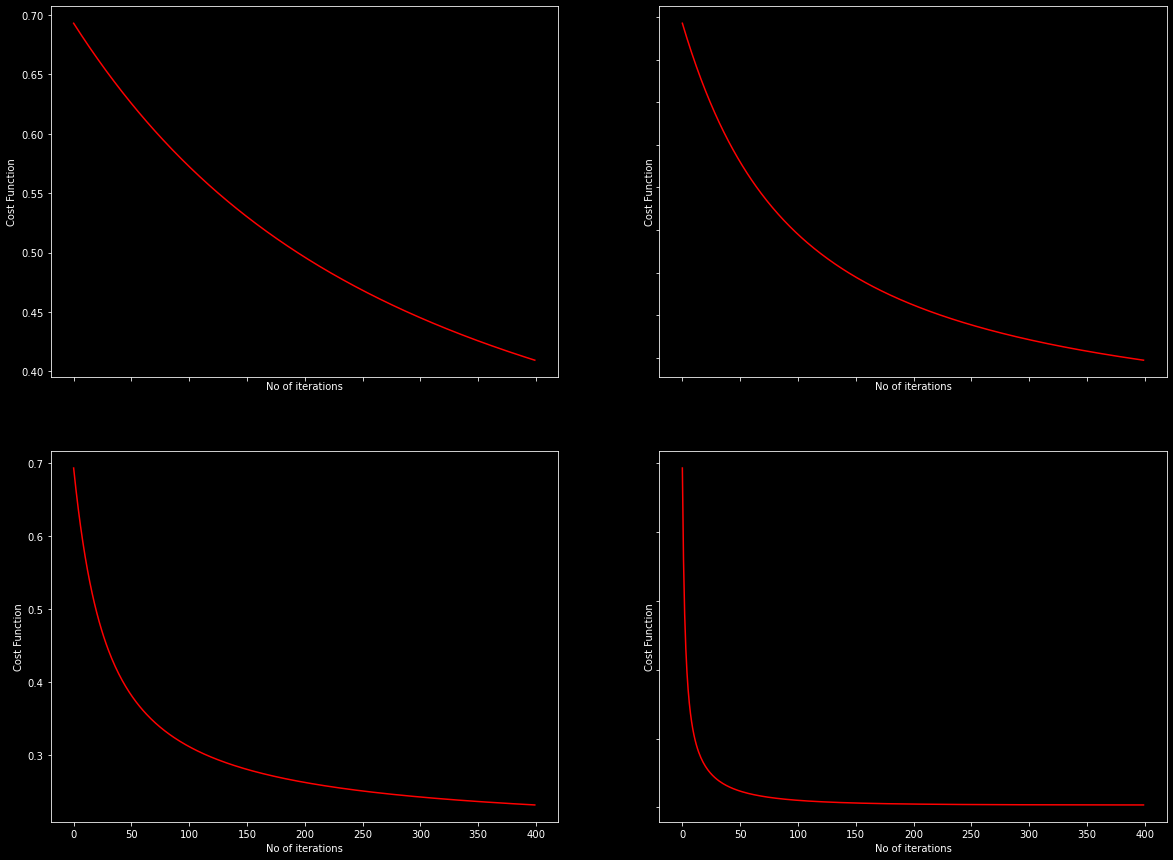

In [15]:
fig = plt.figure(figsize=(20, 15))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)
ax0.plot(J_1, color='Red')
ax1.plot(J_2, color='Red')
ax2.plot(J_3, color='Red')
ax3.plot(J_4, color='Red')

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel('No of iterations')
    ax.set_ylabel('Cost Function')

**We use alpha = 1, normalize original data first**

In [16]:
data_X = data.iloc[:, 0:2]
data_X_norm = (data_X - data_X.mean())/data_X.std()
data_norm = pd.concat([data_X_norm, data['Admit']], axis=1)
data_norm_NA = data_norm.loc[data_norm['Admit'] == 0]
data_norm_A = data_norm.loc[data_norm['Admit'] == 1]

**Visualize data**<br>
The boundary given by:
$$\theta_0 + \theta_1x_1 + \theta_2x_2 = 0 $$

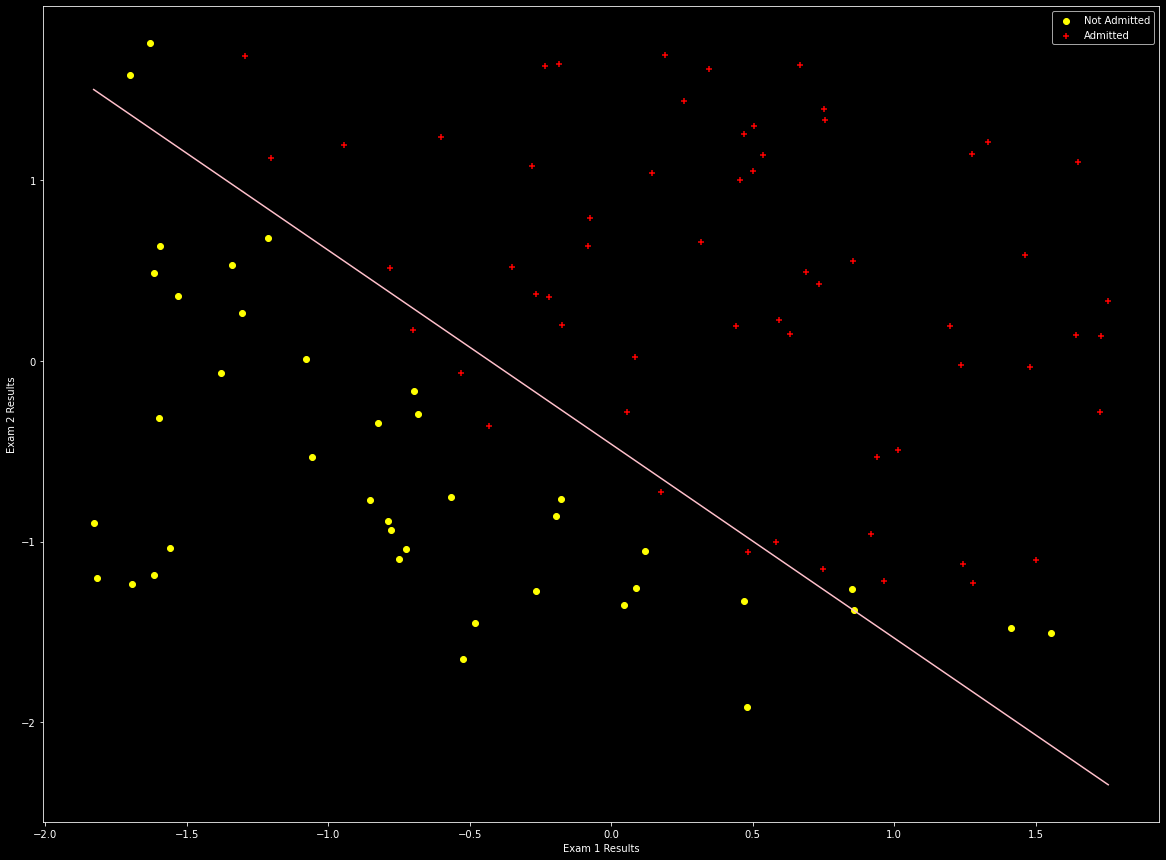

In [17]:
plt.figure(figsize=(20, 15))
plt.scatter(data_norm_NA['Exam 1'], data_norm_NA['Exam 2'], c='Yellow')
plt.scatter(data_norm_A['Exam 1'], data_norm_A['Exam 2'], c='Red', marker='+')
plt.legend(['Not Admitted', 'Admitted'])
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend(['Not Admitted', 'Admitted'])
# Take min and max value of Exam 1 to draw the line, predict x2
x_values = np.array([np.min(data_norm['Exam 1']), np.max(data_norm['Exam 1'])])
y_values = (-theta_4[0][0] - theta_4[1][0] * x_values)/theta_4[2][0]
plt.plot(x_values, y_values, c='Pink')
plt.xlabel('Exam 1 Results')
plt.ylabel('Exam 2 Results')
plt.show()

*Predict Probability for student with score 45 on exam 1 and score 85 on exam 2*

In [18]:
Predict = np.array([45, 85])
Predict = (Predict-data_X.mean())/data_X.std()
Predict = np.hstack(((np.ones((1))), Predict))
print('The probability of a student being admitted with score 45 on exam 1 and score 85 on exam 2 is:',
      Sigmoid(Predict @ theta_4)[0])

The probability of a student being admitted with score 45 on exam 1 and score 85 on exam 2 is: 0.76817711262354


*Now we find the accuracy of the classifier by computing the % of correct classification on our training set*

In [19]:
# Boolean
def classifierpredict(theta, x):
    predict = Sigmoid(x @ theta)
    return predict >= 0.5

In [20]:
p = classifierpredict(theta_4, X_mat_norm)
print('Our training accuracy is:',sum(p == Y_mat)[0], '%')

Our training accuracy is: 89 %
